In [37]:
# !pip install opencv-python transformers accelerate
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, AutoencoderKL, UniPCMultistepScheduler
import torch
from diffusers.utils import load_image


import numpy as np


import cv2
from PIL import Image
import matplotlib.pyplot as plt

In [38]:
controlnets = [
    ControlNetModel.from_pretrained("./albedo_control/controlnet_1/", torch_dtype=torch.float16),
    ControlNetModel.from_pretrained("./albedo_control/controlnet_2/", torch_dtype=torch.float16),
]

In [39]:
pipe = StableDiffusionControlNetPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", controlnet=controlnets, torch_dtype=torch.float16)

safety_checker\model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [40]:
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()


In [53]:
def styletransfer(shadow, albedo):
    images = [shadow, albedo]
    generator = np.random.seed(0)
    image = pipe(
    "",
    num_inference_steps=30,
    image=images,
    controlnet_conditioning_scale=[1.0, 0.7],
    generator=generator,
    
    ).images[0]
    # plot the image

    #plot the shadow, albedo and image
    plt.figure(figsize=(15,5))
    plt.subplot(131)
    plt.imshow(shadow)
    plt.title('shadow')
    plt.subplot(132)
    plt.imshow(albedo)
    plt.title('albedo')
    plt.subplot(133)
    plt.imshow(image)
    plt.title('image')
    plt.show()

  0%|          | 0/30 [00:00<?, ?it/s]

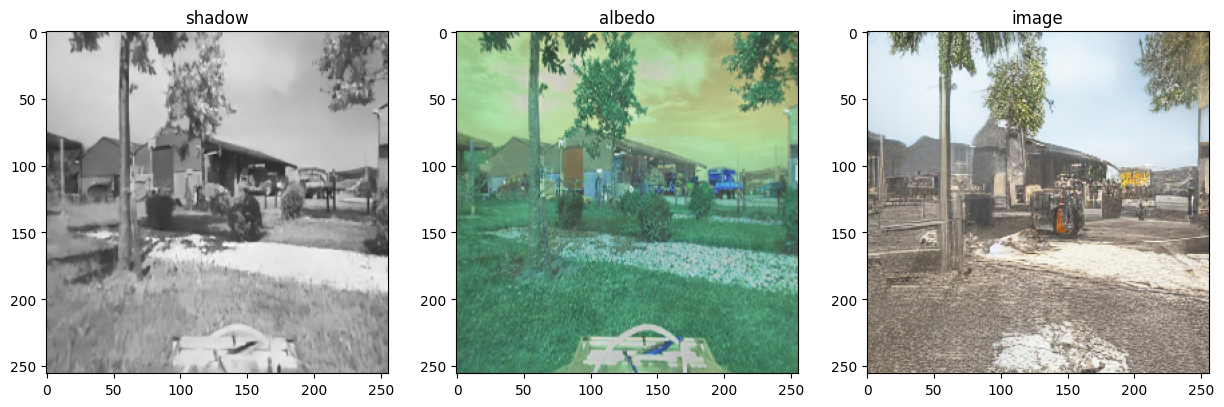

In [54]:
shadow = load_image('./images/uvc_camera_cam_0_f01240_undist_pred_shd.png')
albedo = load_image('./images/uvc_camera_cam_0_f01240_undist_pred_alb.png')

styletransfer(shadow, albedo)

  0%|          | 0/30 [00:00<?, ?it/s]

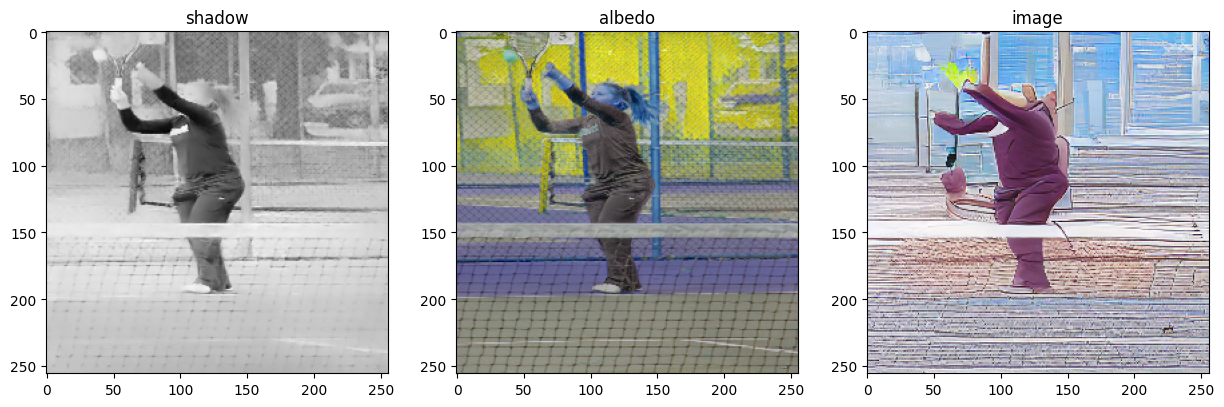

  0%|          | 0/30 [00:00<?, ?it/s]

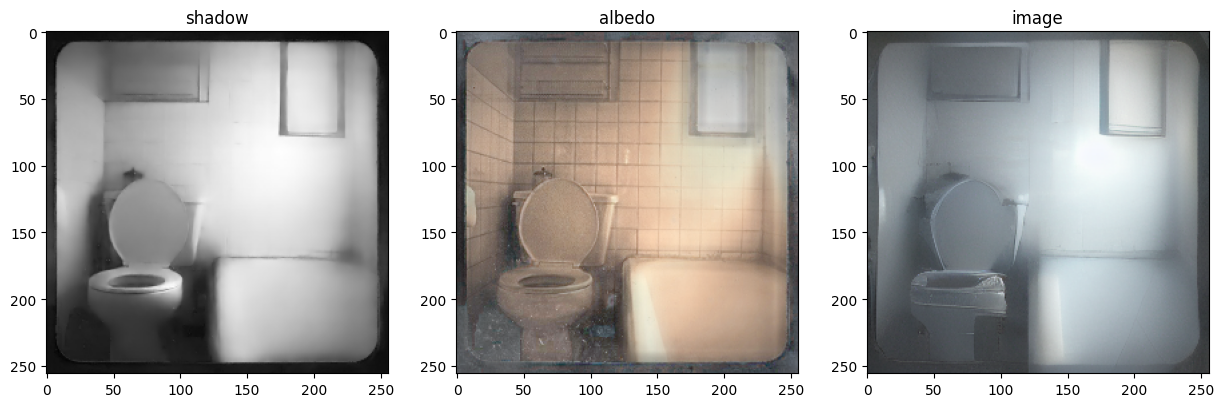

  0%|          | 0/30 [00:00<?, ?it/s]

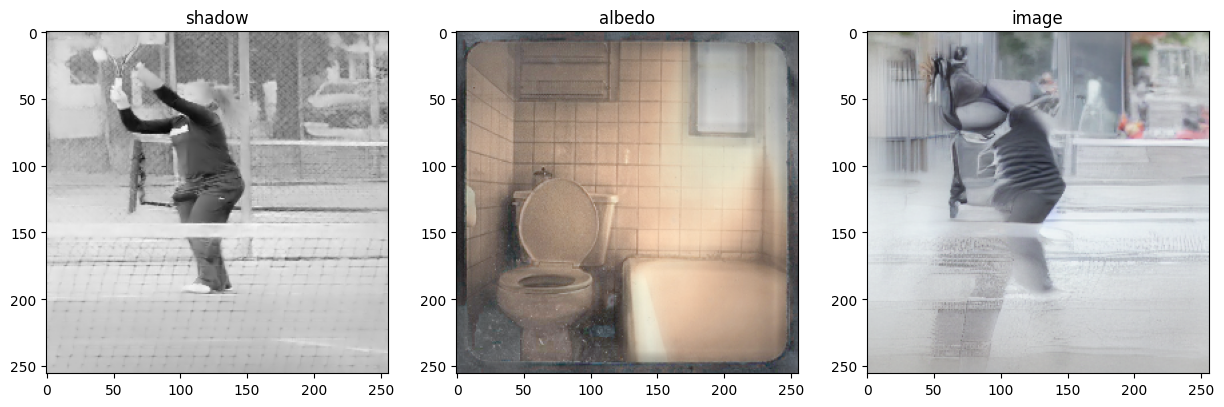

  0%|          | 0/30 [00:00<?, ?it/s]

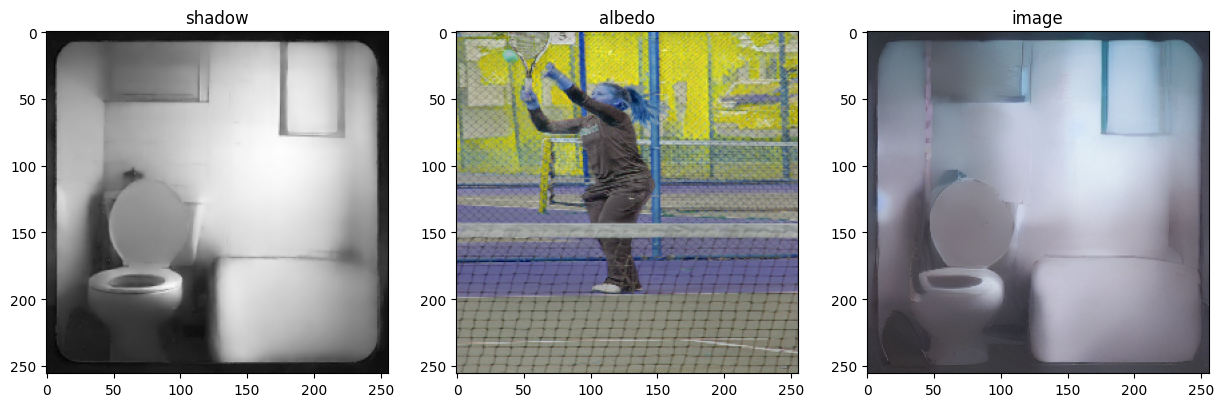

In [55]:
shd1 = load_image('./images/000000004070_pred_shd.png')
alb1 = load_image('./images/000000004070_pred_alb.png')
shd2 = load_image('./images/000000053820_pred_shd.png')
alb2 = load_image('./images/000000053820_pred_alb.png')
styletransfer(shd1,alb1)
styletransfer(shd2,alb2)
styletransfer(shd1,alb2)
styletransfer(shd2,alb1)

  0%|          | 0/30 [00:00<?, ?it/s]

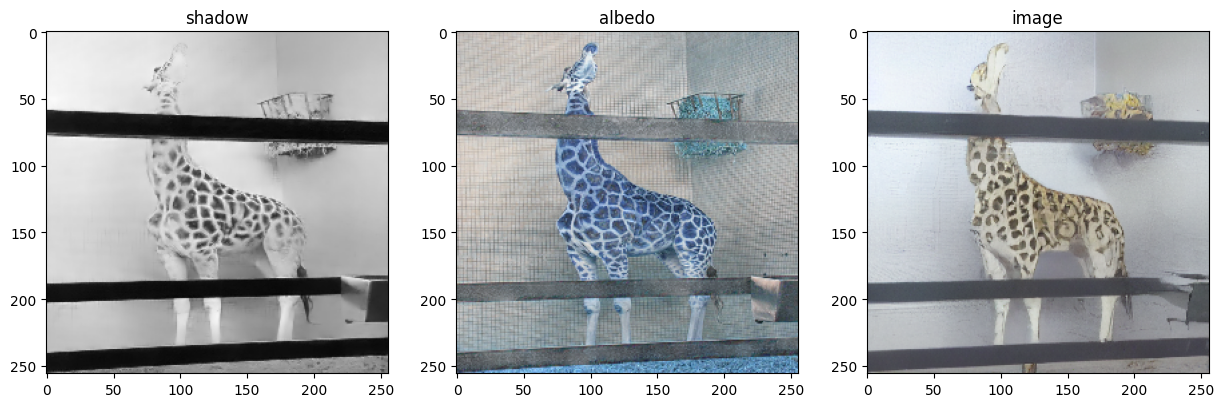

  0%|          | 0/30 [00:00<?, ?it/s]

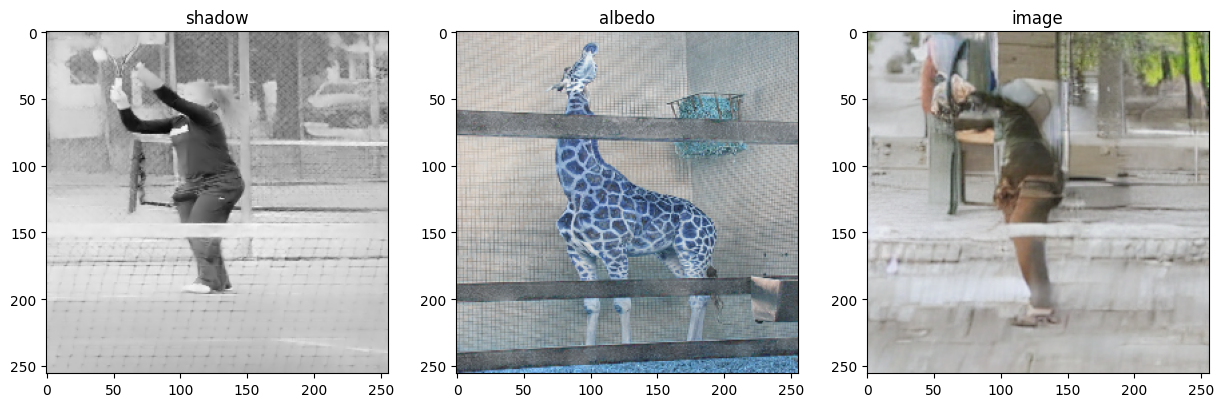

In [56]:
shd3 = load_image("./images/000000531496_pred_shd.png")
alb3 = load_image("./images/000000531496_pred_alb.png")
styletransfer(shd3, alb3)
styletransfer(shd1, alb3) 